# Simple VWAP Trading Test

This strategy will use the _EMA100_ and _VWAP_ to determine if we are in a downtrend or uptrend. It uses a _"certain"_ number of candles (in **any** time frame) as a threshold to do this determination (_ema_candle_threshold_ and _vwap_candle_threshold_).

The entry or exist is based of a certain proximity to the _VWAP_ as the _vwap_threshold_distance_.

In [2]:
import retrieval.cache as cache
import signals.curve as curve

import numpy as np
import pandas as pd
import pandas_ta as ta
import plotly.graph_objects as go

from matplotlib import pyplot as plt
from backtesting import Backtest, Strategy

/opt/homebrew/Caskroom/miniforge/base/envs/pytrading/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Constants

In [1]:
ticker = 'BTC-USD'
start = '2023-01-01'
end = '2024-01-01'
interval = '1h'

column_ts = 'Date'
columns_open = 'Open'
columns_high = 'High'
columns_low = 'Low'
columns_close = 'Close'
columns_volume = 'Volume'
columns_rsi = 'RSI'
columns_atr = 'ATR'
columns_ema100 = 'EMA100'
columns_vwap = 'VWAP'

refresh_cache=False
back_candle_length = 6

### Load the data frame

In [3]:
if not cache.exist_sql_db(ticker, interval) or refresh_cache:
    # load data from yahoo finance and cache it in sql db
    cache.cache_ticker(ticker, interval, start, end)

# Load data from sql db
df = cache.load_ticker(ticker, interval, start, end, index_column=column_ts)

### VWAP and EMA100 Columns

In [4]:
df[columns_ema100] = ta.ema(df[columns_close], length=100)
df[columns_vwap] = ta.vwap(df[columns_high], df[columns_low], df[columns_close], df[columns_volume])

### Plot the data

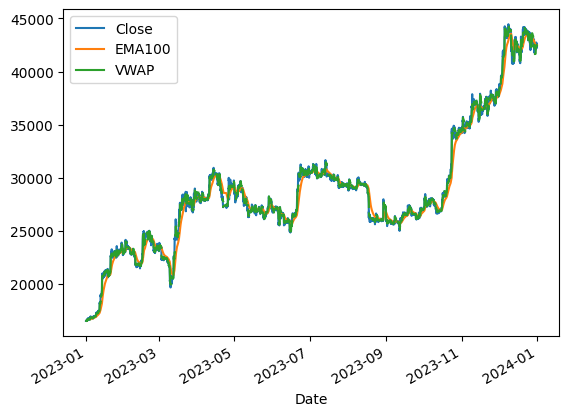

In [5]:
df.plot(y=[columns_close, columns_ema100, columns_vwap])

plt.show()